# Validating Simple Model With Many Samples

We continue the series with another go at the simple inference, this time with 10,000 samples for each likelihood as opposed to the default 100.

Contents:
- [Simple Inference With Many Samples](#Simple-Inference-With-Many-Samples)
- [Quick Sanity Checks](#Quick-Sanity-Checks)
- [Discussion](#Discussion)

### Simple Inference With Many Samples

**Note:** this took 2:20 (hours) to run on 4 nodes, 8 cores/node, 10 hypersamples/core, 10000 samples/hypersample.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
rc('text', usetex=True)

In [20]:
data = np.loadtxt('simpletest10000.txt')
print len(data)

320


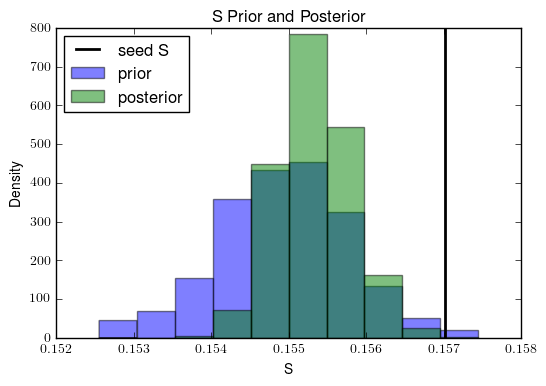

In [21]:
seed_S = 0.1570168038792813
plt.hist(data[:,0], normed=True, alpha=0.5, label='prior')
plt.hist(data[:,0], weights=np.exp(data[:,1]-data[:,1].max()), normed=True, alpha=0.5, label='posterior')
plt.gca().axvline(seed_S, color='k', linewidth=2, label='seed S')
plt.title('S Prior and Posterior')
plt.ylabel('Density')
plt.xlabel('S')
plt.legend(loc=2);

### Quick Sanity Checks

- Confirmed that the process is using dataset with masses drawn from the mass prior. Also confirmed that this dataset is reproducible.
- Confirmed that python and c++ importance sampling functions return similar answers (although random draws are different).

# Discussion
The posterior is generally in the right direction, but it is strange that in the seed region we see the density decrease. Given that this already uses the dataset with masses from the mass function, we do not have a good explanation for the bias in the result. In the [next notebook](ValidatingFullModelWithManySamples_20170629.ipynb) we repeat this inference for the full model.